1. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
2. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).
3. __Use the__ `Validate` __button in the Assignments tab before submitting__.

__Include comments, derivations, explanations, graphs, etc.__ 

You __work in groups__ (= 3 people). __Write the full name and S/U-number of all team members!__

---

# Assignment 1 (Statistical Machine Learning 2024)
# **Deadline: 27 September 2024**

## Instructions
* Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE` __including comments, derivations, explanations, graphs, etc.__ 
Elements and/or intermediate steps required to derive the answer have to be in the report. If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends.
* Please do __not add new cells__ to the notebook, try to write the answers only in the provided cells. Before you turn the assignment in, make sure everything runs as expected.
* __Use the variable names given in the exercises__, do not assign your own variable names. 
* __Only one team member needs to upload the solutions__. This can be done under the Assignments tab, where you fetched the assignments, and where you can also validate your submissions. Please do not change the filenames of the individual Jupyter notebooks.

For any problems or questions regarding the assignments, ask during the tutorial or send an email to charlotte.cambiervannooten@ru.nl and janneke.verbeek@ru.nl .

## Introduction
Assignment 1 consists of:
1. Polynomial curve fitting (50 points);
2. __Gradient descent (25 points);__
3. Fruit boxes (25 points);
4. Probability factorization (BONUS 10 points);

## Libraries

Please __avoid installing new packages__, unless really necessary.

In [19]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it to at least version 3."

# Necessary imports (for solutions)
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

# Set fixed random seed for reproducibility
np.random.seed(2022)

## Gradient descent (weight 25)
In this exercise, we consider the gradient descent algorithm for function minimization. When the function to be minimized is $E(\mathbf{x})$, the gradient descent iteration is  
\begin{equation*}
\mathbf{x}_{n+1} = \mathbf{x}_n - \eta \nabla E(\mathbf{x}_n) \tag{6}
\end{equation*}
where $\eta>0$ is the so-called learning-rate. In the following, we will apply gradient descent to the function
\begin{equation*}
h(x,y) = 100(y - x^2)^2 +(1 - x)^2 \label{banana} \tag{7}
\end{equation*}
### Exercise 2.1
Make a plot of the function $h$ over the interval $[-2 \leq x \leq 2] \times [-1 \leq y \leq 3]$. (Tip: Use the `plot_surface` function.) Can you guess from the plot if numerical minimization with gradient descent will be fast or slow for this function?

YOUR ANSWER HERE
The sides of the plot are steep but they converge to a wide valley. The step size needs to be small to reach the lowest point of that valley. That is why I guess gradient descent will be relatively slow for this function. 

In [20]:
"""
Create function h.
"""
def h(x,y):
    # YOUR CODE HERE
    h = 100*(y-x**2)**2 + (1-x)**2
    return h

"""
Declare x and y.
"""    
# YOUR CODE HERE
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)


In [21]:
"""
Hidden test for function h.
"""

'\nHidden test for function h.\n'

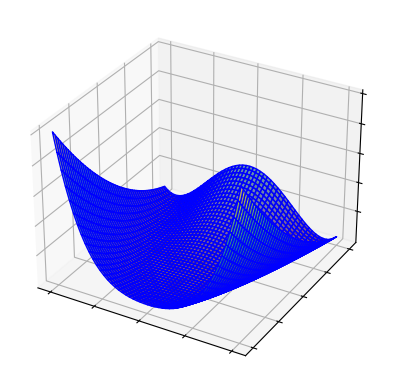

In [22]:
"""
Create a function to plot h.
"""

def plot_h(x,y):
    # YOUR CODE HERE
    x,y = np.meshgrid(x, y)
    z = h(x, y)
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='blue', alpha=0.7)
    
    ax.set(xticklabels=[],
    yticklabels=[],
    zticklabels=[])

    plt.show()


plot_h(x,y)


### Exercise 2.2
Knowing that a critical point of a function is a point where the gradient vanishes, show that $(1, 1)$ is the unique critical point of $h$.  Prove that this point is a minimum for $h$. 

YOUR ANSWER HERE
compute the critical point by taking 2 partial derivatives

$$\frac{dh}{dx} = \frac{d}{dx}[100(y - x^2)^2 + (1 - x)^2]$$
$$ = 100*2*-2x(y - x^2) - 2*(1 - x)$$
$$ = -400x(y - x^2) - 2*(1 - x)$$

$$\frac{dh}{dy} = \frac{d}{dy}[100(y - x^2)^2 +(1 - x)^2]$$
$$ = 100*2(y - x^2)$$
$$ = 200(y - x^2)$$

set derivatives to 0 
$$ 200(y - x^2) = 0$$
$$ y - x^2 = 0$$
$$ y = x^2$$

substitute y in the other derivative
$$ -400x(x^2 - x^2) - 2*(1 - x) = 0$$
$$ 2*(1 - x) = 0$$
$$ 2 - 2x = 0$$
$$ x = 1 $$

fill in x in y 
$$ y = 1^2 $$
$$ y = 1 $$


To check the minimum we take the double derivatives
$$ \frac{d^2h}{dx^2} = \frac{d}{dx}[-400x(y - x^2) - 2*(1 - x)]$$
$$ -400(y - 3x^2) + 2 = 0$$

$$ \frac{d^2h}{dxdy} = \frac{d}{dy}[-400x(y - x^2) - 2*(1 - x)]$$
$$ = -400x $$

$$ \frac{d^2h}{dy^2}= \frac{d}{dy}[200(y - x^2)]$$
$$ = 200 $$

$$ \frac{d^2h}{dydx} = \frac{d}{dx}[200(y - x^2)]$$
$$ = -400x $$
Gives Hessian matrix

H(x, y) = 
\begin{bmatrix}
-400(y - 3x^2) + 2 & -400x \\
-400x & 2\end{bmatrix}

Filling in the critical point gives:

H(1, 1) = 
\begin{bmatrix}
802 & -400 \\
-400 & 200
\end{bmatrix}

$$Det(H) = 802*200 - (-400)^2 = 400$$
This is bigger than zero and $\frac{d^2h}{dx^2}>0$, which me it is a minimum.x}


### Exercise 2.3
Write down the gradient descent iteration rule for function $h$. 

YOUR ANSWER HERE

$\mathbf{x}_{n+1} = \mathbf{x}_n - \eta \nabla E(\mathbf{x}_n)$ is the standard function for gradient descent. 

Applying these to both partial derivative of x and y gives the following formulas:

$$x_{n+1} = x_n - \eta (-400x_n(y_n - x_n^2) - 2(1-x_n))$$
$$y_{n+1} = y_n - \eta (200(y_n - x_n^2)$$




### Exercise 2.4
Implement gradient descent. Try some different values of $\eta$. Does the algorithm converge? How fast? Make plots of the trajectories on top of a contour plot of $h$. (Hint: have a look at the example contour_example.py on Brightspace for inspiration to plot contours of functions and trajectories). Report your findings. Explain why numerical minimization with gradient descent is slow for this function.

First implement the derivative of $h(x,y)$.

In [23]:
def dh_dxy(x, y):
    """
    This function is the derivative of the function h(x, y).
    
    Parameters
    ----------
    x : float
        data point from x-axis
    y : float
        data point from y-axis
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    """
    # YOUR CODE HERE
    dh_dx = -400*x*(y-x**2) - 2*(1-x)
    dh_dy = 200*(y-x**2)

    return np.array([dh_dx, dh_dy])

In [24]:
"""
Test for dh_dxy.
"""
assert np.array_equal(dh_dxy(1, 1), np.array([0, 0]))

Now implement the gradient descent algorithm.

In [25]:
def grad_descent(grad, val_init, eta, max_iter, tol):
    """ This function implements the gradient descent algorithm.
    
    Parameters
    ----------
    grad : function
        Returns the derivative of the function with respect to the pair (x, y).
    val_init : tuple
        Initial values for parameters
    eta : float
        Gradient descent learning rate
    max_iter : int
        Maximum number of gradient descent iterations
    tol : float
        Tolerance for detecting convergence
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    dists : array
        NumPy array of distances from the current point to the previous point
    tot_iter : int
        Number of performed gradient descent iterations
    """
    # YOUR CODE HERE
    x,y = val_init
    vals = [(x,y)]
    for tot_iter in range(max_iter):
        derivatives = dh_dxy(x, y)
        x_next = x - eta * derivatives[0]
        y_next = y - eta * derivatives[1]
        dists = np.linalg.norm([x_next - x, y_next - y])
        vals.append((x_next, y_next))

        if dists < tol:
            break

        x,y = x_next, y_next


    return np.array(vals), dists, tot_iter+1
        
    raise NotImplementedError()

In [26]:
"""
Hidden test for grad_descent.
"""

'\nHidden test for grad_descent.\n'

Finally, run the gradient descent algorithm with different values of $\eta$.

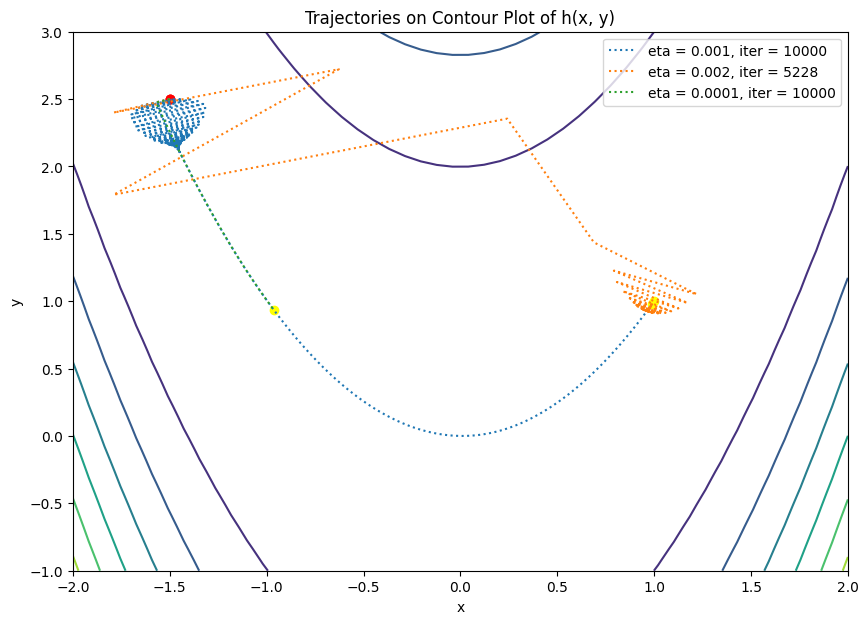

In [36]:
# YOUR CODE HERE
eta = [0.001, 0.002, 0.0001]
point = (-1.5, 2.5)
tol = 1e-6
max_iter = 10000

g = lambda x, y: 100 * (y - x**2)**2 + (1 - x)**2
  
# calculate function value(s) on a grid
X, Y = np.meshgrid(np.linspace(-2, 2, endpoint = True), np.linspace(-1, 3, endpoint = True))
Z = g(X, Y)

fig, ax = plt.subplots(figsize=(10, 7))
contour = ax.contour(X, Y, Z)

for e in eta:
    values, dists, tot_iter = grad_descent(dh_dxy, point, e, max_iter, tol)
    ax.plot(values[:, 0], values[:, 1], linestyle='dotted', label=f"eta = {e}, iter = {tot_iter}")

    ax.scatter(*values[0], color='red')  # Start point
    ax.scatter(*values[-1], color='yellow')  # End point

# Plot labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trajectories on Contour Plot of h(x, y)')
ax.legend()
plt.show()

Explain what you see!

YOUR ANSWER HERE:

First the 3 eta were [0.0001, 0.001, 0.01], but the latter led to an error because the values became too high to compute. When the last learning rate 